This Code is written by Ahmad Azeem.

## Project "Concrete Strength Prediction"

## Objective
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.


#### Resources Available
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/.

### Steps and Tasks:

##### Exploratory Data Quality Report Reflecting the Following:

1. Univariate analysis<br>
  Data types and description of the independent attributes which should include
  - name, 
  - range of values observed, 
  - central values (mean and median), 
  - standard deviation and quartiles, 
  - analysis of the body of distributions/tails, 
  - missing values, 
  - outliers, 
  - duplicates
  <br><br>
2. Bi-variate analysis between the predictor variables and target column. 
 - Comment on your findings in terms of their relationship and degree of relation if any. 
 - Visualize the analysis using boxplots and pair plots, histograms, or density curves. 
<br><br>
3. Feature Engineering techniques<br>
 (1) Identify opportunities (if any) to extract new features from existing features, drop a feature(if required)<br> Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. <br>
From this, we can extract a new feature Area which would be length * breadth.<br>
 (2) Get the data model ready and do a train test split.<br>
 (3) Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.<br>


##### Creating the Model and Tuning it:

1. Algorithms that you think will be suitable for this project. 
 - Use Kfold Cross-Validation to evaluate model performance. 
 - Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). 
<br><br>
2. Techniques employed to squeeze that extra performance out of the model without making it overfit. 
 - Use Grid Search or Random Search on any of the two models used above. 
 - Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. 

### Attribute Information:

	Name	Data Type	Measurement	Description
1.	Cement (cement),	quantitative,	kg in a m3 mixture,	Input Variable
2.	Blast Furnace Slag (slag),	quantitative,	kg in a m3 mixture,	Input Variable
3.	Fly Ash (ash),	quantitative,	kg in a m3 mixture,	Input Variable
4.	Water(water),	quantitative,	kg in a m3 mixture,	Input Variable
5.	Superplasticizer (superplastic),	quantitative,	kg in a m3 mixture,	Input Variable
6.	Coarse Aggregate (coarseagg),	quantitative,	kg in a m3 mixture,	Input Variable
7.	Fine Aggregate (fineagg),	quantitative,	kg in a m3 mixture,	Input Variable
8.	Age(age),	quantitative,	Day (1~365),	Input Variable
9.	Concrete compressive strength(strength),	quantitative,	MPa,	Output Variable

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Time

In [231]:
from datetime import datetime
startTime = datetime.now()
print(startTime)

2024-10-19 11:53:55.130281


### Import all necessary modules and load the data

In [232]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [233]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
pd.options.display.float_format = '{:,.4f}'.format

In [235]:
 df=pd.read_csv('concrete_data.csv', sep=',')

In [236]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0000,0.0000,0.0000,162.0000,2.5000,"1,040.0000",676.0000,28,79.9900
1,540.0000,0.0000,0.0000,162.0000,2.5000,"1,055.0000",676.0000,28,61.8900
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270,40.2700
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365,41.0500
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360,44.3000


In [237]:
df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2800
1026,322.2000,0.0000,115.6000,196.0000,10.4000,817.9000,813.4000,28,31.1800
1027,148.5000,139.4000,108.6000,192.7000,6.1000,892.4000,780.0000,28,23.7000
1028,159.1000,186.7000,0.0000,175.6000,11.3000,989.6000,788.9000,28,32.7700
1029,260.9000,100.5000,78.3000,200.6000,8.6000,864.5000,761.5000,28,32.4000


In [238]:
###Rename Attributes

 

# Rename a column
df.rename(columns={'concrete_compressive_strength': 'strength'}, inplace=True)

# Check the updated DataFrame
print(df)



       cement  blast_furnace_slag  fly_ash    water  superplasticizer  \
0    540.0000              0.0000   0.0000 162.0000            2.5000   
1    540.0000              0.0000   0.0000 162.0000            2.5000   
2    332.5000            142.5000   0.0000 228.0000            0.0000   
3    332.5000            142.5000   0.0000 228.0000            0.0000   
4    198.6000            132.4000   0.0000 192.0000            0.0000   
...       ...                 ...      ...      ...               ...   
1025 276.4000            116.0000  90.3000 179.6000            8.9000   
1026 322.2000              0.0000 115.6000 196.0000           10.4000   
1027 148.5000            139.4000 108.6000 192.7000            6.1000   
1028 159.1000            186.7000   0.0000 175.6000           11.3000   
1029 260.9000            100.5000  78.3000 200.6000            8.6000   

      coarse_aggregate  fine_aggregate  age  strength  
0           1,040.0000        676.0000   28   79.9900  
1          

### Shape, Check for null values, Data types, Descriptive statistics

In [239]:
df.shape

(1030, 9)

In [240]:
df.isnull().any()

cement                False
blast_furnace_slag    False
fly_ash               False
water                 False
superplasticizer      False
coarse_aggregate      False
fine_aggregate        False
age                   False
strength              False
dtype: bool

##### <i>[Note] There is no null data

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.0000",281.1679,104.5064,102.0000,192.3750,272.9000,350.0000,540.0000
blast_furnace_slag,"1,030.0000",73.8958,86.2793,0.0000,0.0000,22.0000,142.9500,359.4000
fly_ash,"1,030.0000",54.1883,63.9970,0.0000,0.0000,0.0000,118.3000,200.1000
water,"1,030.0000",181.5673,21.3542,121.8000,164.9000,185.0000,192.0000,247.0000
superplasticizer,"1,030.0000",6.2047,5.9738,0.0000,0.0000,6.4000,10.2000,32.2000
coarse_aggregate,"1,030.0000",972.9189,77.7540,801.0000,932.0000,968.0000,"1,029.4000","1,145.0000"
fine_aggregate,"1,030.0000",773.5805,80.1760,594.0000,730.9500,779.5000,824.0000,992.6000
age,"1,030.0000",45.6621,63.1699,1.0000,7.0000,28.0000,56.0000,365.0000
strength,"1,030.0000",35.8180,16.7057,2.3300,23.7100,34.4450,46.1350,82.6000


##### <i>[Insights]
<i>All variables are numerical.
<br><i>All variables except age are continuous.
<br><i>There are no null values.
<br><i>There are no negative values.

### Skewness and Kurtosis

In [243]:
df.skew().sort_values(ascending=False)

age                   3.2692
superplasticizer      0.9072
blast_furnace_slag    0.8007
fly_ash               0.5374
cement                0.5095
strength              0.4170
water                 0.0746
coarse_aggregate     -0.0402
fine_aggregate       -0.2530
dtype: float64

In [244]:
df.kurt().sort_values(ascending=False)

age                  12.1690
superplasticizer      1.4113
water                 0.1221
fine_aggregate       -0.1022
strength             -0.3137
blast_furnace_slag   -0.5082
cement               -0.5207
coarse_aggregate     -0.5990
fly_ash              -1.3287
dtype: float64

##### <i>[Insights]
<i>"Age" has higher skewness (right skewed) and kurtosis.
<br><i>Based on mean and median value, "slag", "ash", "superplastic" are also right skewed.

### Duplicates

##### Check whether there are duplicated values

In [245]:
# pandas.DataFrame.duplicated
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [246]:
df.duplicated().any()

True

In [247]:
# By setting keep on False, all duplicates are True.
df.duplicated(keep=False).sum()

36

In [248]:
# By default, for each set of duplicated values, the first occurrence is set on False and all others on True.
df.duplicated().sum()

25

In [249]:
df[df.duplicated()].sort_values(ascending=True, by="strength")

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
809,252.0000,0.0000,0.0000,185.0000,0.0000,"1,111.0000",784.0000,28,19.6900
77,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
80,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,3,33.4000
86,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
88,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
91,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,3,35.3000
100,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,7,49.2000
103,425.0000,106.3000,0.0000,153.5000,16.5000,852.1000,887.1000,7,49.2000
109,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,7,55.9000
111,362.6000,189.0000,0.0000,164.9000,11.6000,944.7000,755.8000,7,55.9000


##### Drop duplicated values


In [250]:
# pandas.DataFrame.drop_duplicates
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [251]:
df.drop_duplicates(inplace=True)

In [252]:
df.shape

(1005, 9)

##### Displot

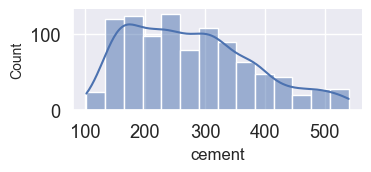

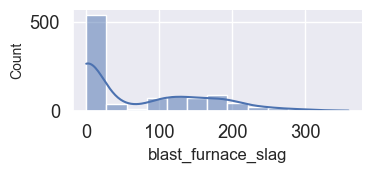

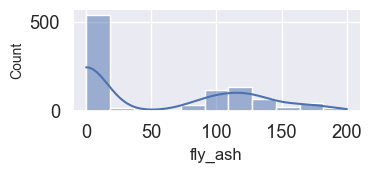

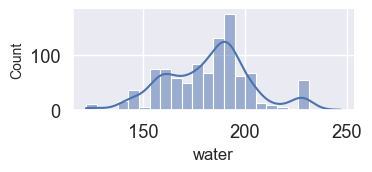

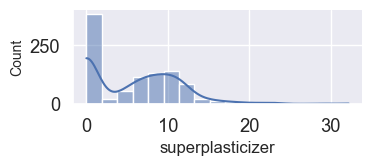

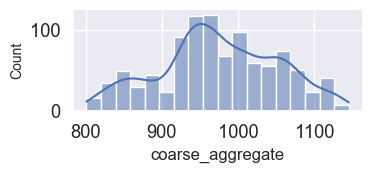

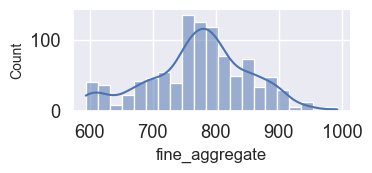

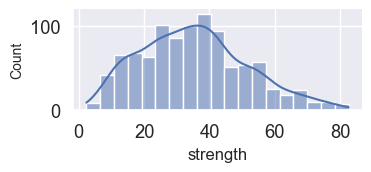

In [253]:
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        sns.displot(df[col], kde=True, height=2, aspect=2)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=10)
        plt.show()

##### <i>[Insights]
<i>"slag", "ash", "superplastic", and "age" are right skewed and right tailed.
<br><i>Other variables are relatively close to normal distribution and symmetrical

##### Boxplot

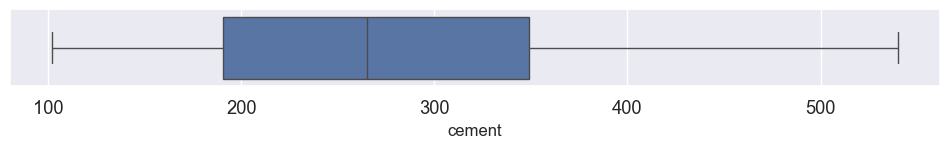

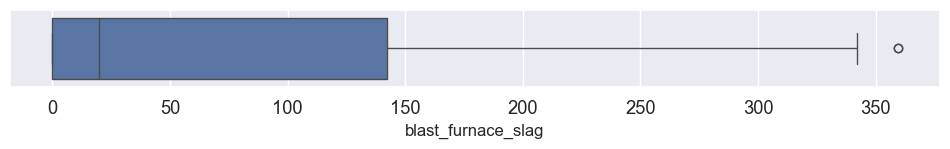

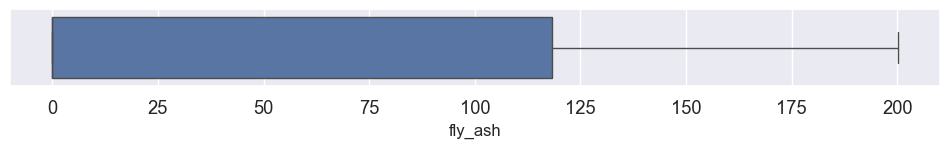

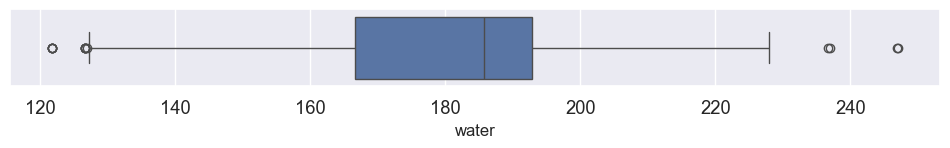

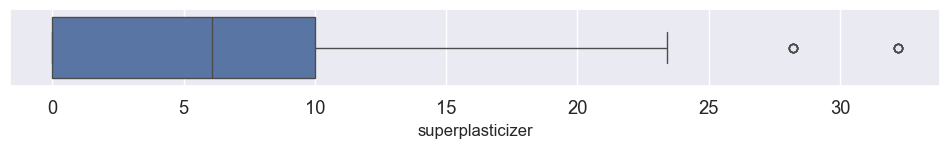

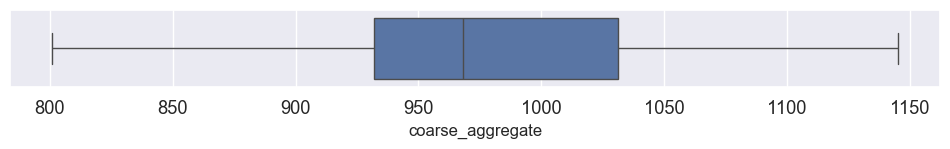

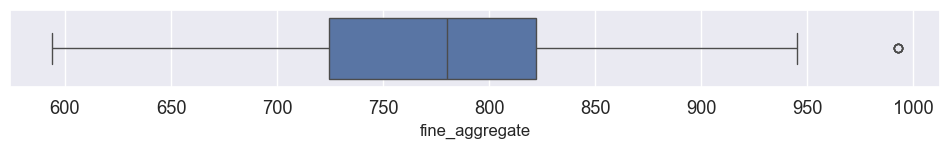

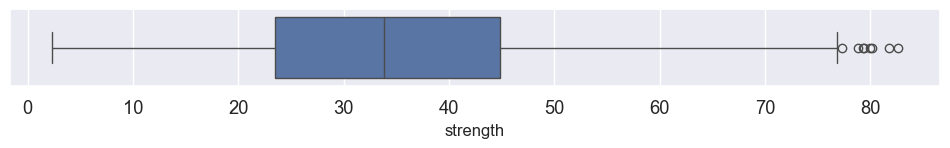

In [254]:
for i in df.columns:
    if df[i].dtypes == int or df[i].dtypes == float:
        plt.figure(figsize=(12,1))
        sns.boxplot(x=i, data=df)
        plt.xlabel(i ,fontsize=12)
        plt.show()
        print()

##### <i>[Insights]
<i>"slag", "superplastic", "fineagg", "age", and "strength" have some outliers in the right side.
<br><i>"water" have outliers in both sides.

##### heatmap (Correlation)

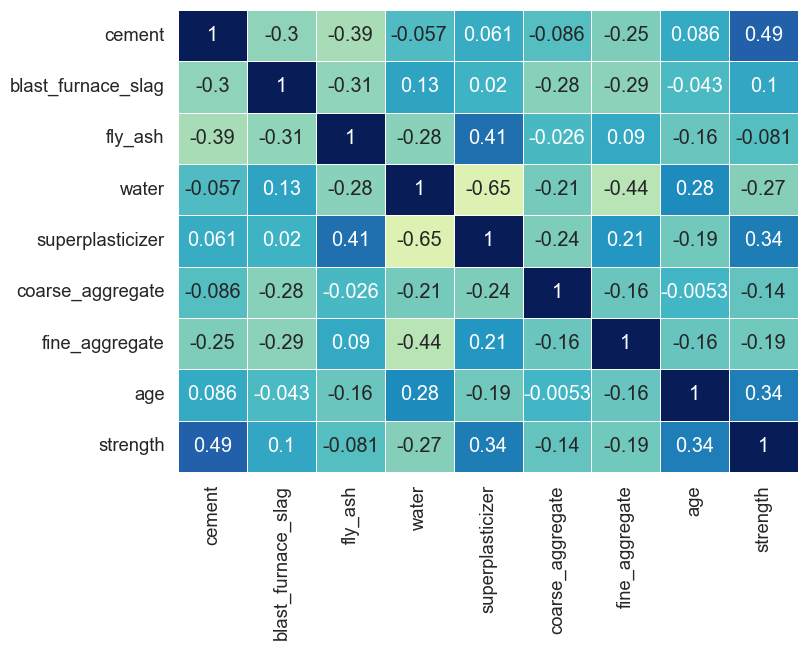

In [255]:
plt.figure(figsize=(8, 6))

# Change Font size
sns.set(font_scale=1.2)

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

##### <i>[Insights]
<i>Following variables have high correrations (positive / negative 0.5 or higher)
    <br><i> - "water" and "superplastic"<br>
<br><i>Following variables have relatively higher correrations (positive / negative 0.4 or higher)
    <br><i> - "cement" and "strength"
    <br><i> - "ash" and "superplastic"
    <br><i> - "water" and "fineagg"<br>
<br><i>Following variables have relatively moderate correrations (positive / negative 0.3 or higher)
    <br><i> - "superplastic" and "strength"
    <br><i> - "age" and "strength"
    <br><i> - "cement" and "slag"
    <br><i> - "cement" and "ash"
    <br><i> - "slag" and "ash"


##### Pairplot

In [256]:
########### Run only before submitting the work ###########
###sns.pairplot(df)

##### <i>[Notes]
<i>According to Wikipedia, "Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete. Plasticizers are chemical compounds that enable the production of concrete with approximately 15% less water content. Superplasticizers allow reduction in water content by 30% or more." (https://en.wikipedia.org/wiki/Superplasticizer)
<br><i>This explains the reason of high negative correration between "water" and "superplastic".
<br><i>Since the "Superplasticizers" is the additives which enabels the reduction of the water, we will drop "water" from the variables.

In [257]:
#df.drop('water', axis=1, inplace=True)

##### <i>[Notes]
<i> Tried dropping "water" but since it caused the accuracy score drop in many models, commented out.

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1005 non-null   float64
 1   blast_furnace_slag  1005 non-null   float64
 2   fly_ash             1005 non-null   float64
 3   water               1005 non-null   float64
 4   superplasticizer    1005 non-null   float64
 5   coarse_aggregate    1005 non-null   float64
 6   fine_aggregate      1005 non-null   float64
 7   age                 1005 non-null   int64  
 8   strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


### Split the dataset into train set test set also the validation 

In [259]:
X = df.drop('strength', axis=1)
y = df['strength']

In [260]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [261]:
from sklearn.model_selection import train_test_split
X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)

In [262]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(703, 8)
(151, 8)
(151, 8)


### Models

#### Linear Regression

In [263]:
model_name = 'Linear Regression'

In [264]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [265]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [267]:
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred)**0.5

# R2 Squared:
r2s = r2_score(y_test, y_pred)

# Training Score
accuracy_training = model.score(X_train, y_train)

# Testing Score
accuracy_testing = model.score(X_test, y_test)

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':[model_name],
                          'Training accuracy': [accuracy_training],
                          'Testing accuracy': [accuracy_testing],
                          'Mean Absolute Error': [mae],
                          'Root Mean Squared Error': [rmse],
                          'R2 Squared': [r2s]
                         })
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']]
resultsDf

,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617


In [268]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),4)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
0,cement,0.1035
1,blast_furnace_slag,0.1035
2,fly_ash,0.1035
3,water,0.1035
4,superplasticizer,0.1035
5,coarse_aggregate,0.1035
6,fine_aggregate,0.1035
7,age,0.1035


#### Linear Regression (Preprocessing Scale)

In [269]:
model_name = 'Linear Regression (Preprocessing Scale)'

In [270]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [271]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [272]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [273]:
# Function to calculate and print the score for each models

def print_results(model, X_train, y_train, X_test, y_test, resultsDf):
    y_pred = model.predict(X_test)

    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # RMSE (Root Mean Squared Error)
    rmse = mean_squared_error(y_test, y_pred)**0.5

    # R2 Squared:
    r2s = r2_score(y_test, y_pred)

    # Training Score
    accuracy_training = model.score(X_train, y_train)

    # Testing Score
    accuracy_testing = model.score(X_test, y_test)

    tempResultsDf = pd.DataFrame({'Method':[model_name],
                                'Training accuracy': [accuracy_training],
                                'Testing accuracy': [accuracy_testing],
                                'Mean Absolute Error': [mae],
                                'Root Mean Squared Error': [rmse],
                                'R2 Squared': [r2s]
                             })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']].reset_index()
    return resultsDf

In [274]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,0,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636


#### Linear Regression (Standard Scaler)

In [275]:
model_name = 'Linear Regression (Standard Scale)'

In [276]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [277]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [278]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [279]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,0,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617


#### Linear Regression (MixMax Scaler)

In [280]:
model_name = 'Linear Regression (MinMax Scale)'

In [281]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [282]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [284]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,0,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617


#### Ridge Regression

In [285]:
model_name = 'Ridge Regression'

In [286]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [287]:
from sklearn.linear_model import Ridge

In [288]:
model = Ridge(alpha=.3)
model.fit(X_train, y_train)

Ridge(alpha=0.3)

In [289]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,0,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617


#### Ridge Regression (Standard Scaler)

In [290]:
model_name = 'Ridge Regression (Standard Scaler)'

In [291]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [292]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [293]:
from sklearn.linear_model import Ridge

In [294]:
model = Ridge(alpha=.3)
model.fit(X_train, y_train)

Ridge(alpha=0.3)

In [295]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,0,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615


#### Lasso Regression

In [296]:
model_name = 'Lasso Regression'

In [297]:
from sklearn.linear_model import Lasso

In [298]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [299]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)

Lasso(alpha=0.2)

In [300]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,0,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618


#### Lasso Regression (Standard Scaler)

In [301]:
model_name = 'Lasso Regression (Standard Scaler)'

In [302]:
from sklearn.linear_model import Lasso

In [303]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [304]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [305]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)

Lasso(alpha=0.2)

In [306]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,0,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628


#### Linear Regression & Polynomial models

In [307]:
model_name = 'Linear Regression & Polynomial models'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [308]:
from sklearn.preprocessing import PolynomialFeatures

In [309]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [310]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])

In [311]:
model = pipe

In [312]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,0,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144


#### Ridge Regression & Polynomial models

In [313]:
model_name = 'Ridge Regression & Polynomial models'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [314]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Ridge(alpha=.3))
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('ridge', Ridge(alpha=0.3))])

In [315]:
model = pipe

In [316]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,0,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


####  Lasso Regression & Polynomial models

In [317]:
model_name = 'Lasso Regression & Polynomial models '

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [318]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Lasso(alpha=0.2))
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('lasso', Lasso(alpha=0.2))])

In [319]:
model = pipe

In [320]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Feature Selection

In [321]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [322]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [323]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [324]:
# Build step forward feature selection
sfs1 = sfs(model, k_features=5, forward=True, scoring='r2', cv=5)

In [325]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [326]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.07566854, 0.25015108, 0.23365081, 0.27103511, 0.31378923]),
  'avg_score': 0.22885895204208345,
  'feature_names': ('0',),
  'ci_bound': 0.10431558839366917,
  'std_dev': 0.08116107171366688,
  'std_err': 0.04058053585683343},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.22612364, 0.39845903, 0.3725697 , 0.3157166 , 0.42388173]),
  'avg_score': 0.3473501385186561,
  'feature_names': ('0', '4'),
  'ci_bound': 0.09052276596137412,
  'std_dev': 0.07042978727383035,
  'std_err': 0.03521489363691518},
 3: {'feature_idx': (0, 4, 7),
  'cv_scores': array([0.43293676, 0.55185439, 0.46343614, 0.46622279, 0.49384621]),
  'avg_score': 0.48165925787267644,
  'feature_names': ('0', '4', '7'),
  'ci_bound': 0.05147626524212945,
  'std_dev': 0.04005028317629426,
  'std_err': 0.020025141588147128},
 4: {'feature_idx': (0, 1, 4, 7),
  'cv_scores': array([0.47848238, 0.59550346, 0.53980752, 0.56582783, 0.51858688]),
  'avg_score': 0.53964161349188

In [327]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

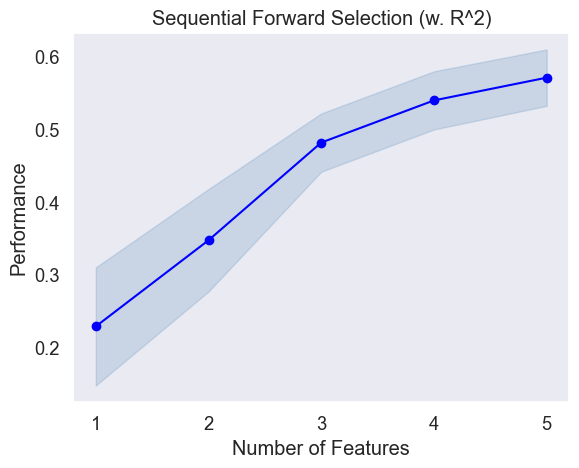

In [328]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [329]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 4, 7]


In [330]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age']


In [331]:
model = LinearRegression()
model.fit(X_train[subsetColumnList], y_train)

LinearRegression()

In [332]:
y_train_pred = model.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % model.score(X_train[subsetColumnList], y_train))
accuracy_training = model.score(X_train[subsetColumnList], y_train)

Training accuracy on selected features: 0.581


In [333]:
y_test_pred = model.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % model.score(X_test[subsetColumnList], y_test))
accuracy_testing = model.score(X_test[subsetColumnList], y_test)

Testing accuracy on selected features: 0.512


In [334]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [335]:
y_train_pred = model.predict(X_train)
print('Training accuracy on selected features: %.3f' % model.score(X_train, y_train))

Training accuracy on selected features: 0.618


In [336]:
y_test_pred = model.predict(X_test)
print('Testing accuracy on selected features: %.3f' % model.score(X_test, y_test))

Testing accuracy on selected features: 0.562


In [337]:
model_name = 'LinearRegression & Feature Selection'

In [338]:
y_pred = y_test_pred

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred)**0.5
print("Root Mean Squared Error: ", rmse)

# R2 Squared:
r2s = r2_score(y_test, y_pred)
print("R2 Squared: ", r2s)

Mean Absolute Error:  8.710258908349896
Root Mean Squared Error:  10.862804345350025
R2 Squared:  0.5616995366352389


In [339]:
tempResultsDf = pd.DataFrame({'Method':[model_name],
                            'Training accuracy': [accuracy_training],
                            'Testing accuracy': [accuracy_testing],
                            'Mean Absolute Error': [mae],
                            'Root Mean Squared Error': [rmse],
                            'R2 Squared': [r2s]
                         })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Training accuracy', 'Testing accuracy', 'Mean Absolute Error', 'Root Mean Squared Error', 'R2 Squared']].reset_index()
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


##### <i>[Insights]
<i>In this case, feature selection did not improve any accuracy.

#### Decision Tree (Regression)

In [340]:
model_name = 'Decision Tree (Regression)'

In [341]:
from sklearn.tree import DecisionTreeRegressor

In [342]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [343]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [344]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Linear SVR

In [345]:
model_name = 'Linear SVR'

In [346]:
from sklearn.svm import LinearSVR

In [347]:
#X_train, X_inter, y_train, y_inter = train_test_split(X, y, test_size=.3, random_state=1)
#X_validation, X_test, y_validation, y_test = train_test_split(X_inter, y_inter, test_size=.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [348]:
model = LinearSVR(epsilon=13, random_state=1)
model.fit(X_train, y_train)

LinearSVR(epsilon=13, random_state=1)

In [349]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Linear SVR & MinMax Scaler

In [350]:
model_name = 'Linear SVR & MinMax S.'

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [352]:
pipe = make_pipeline(MinMaxScaler(), LinearSVR(C=100))
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearsvr', LinearSVR(C=100))])

In [353]:
model = pipe

In [354]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Linear SVR & Standard Scaler

In [355]:
model_name = 'Linear SVR & Standard S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [356]:
pipe = make_pipeline(StandardScaler(), LinearSVR(C=100))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(C=100))])

In [357]:
model = pipe

In [358]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Decision Tree Regressor & Standard Scaler

In [359]:
model_name = 'DT Reg. & Standard S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [360]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=6))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=6))])

In [361]:
model = pipe

In [362]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Bagging Regressor & Standard Scaler

In [363]:
model_name = 'Bagging Reg. & StandardS.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [364]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

In [365]:
pipe = make_pipeline(StandardScaler(), BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(estimator=SVR(), random_state=1))])

In [366]:
model = pipe

In [367]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Gradient Boosting Regressor & MinMax Scaler

In [368]:
model_name = 'Grad. Boost. Reg. & MinMax.S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [369]:
from sklearn.ensemble import GradientBoostingRegressor

In [370]:
pipe = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(loss='squared_error', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=10, random_state=1))])

In [371]:
model = pipe

In [372]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Gradient Boosting Regressor & Standard Scaler

In [373]:
model_name = 'Grad. Boost. Reg. & Std.S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [374]:
pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss='squared_error', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=10, random_state=1))])

In [375]:
model = pipe

In [376]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Gradient Boosting Regressor & Standard Scaler & PCA

In [377]:
model_name = 'Grad. Boost. Reg. & Std.S. & PCA'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [378]:
from sklearn.decomposition import PCA 

In [379]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), GradientBoostingRegressor(loss='squared_error', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=10, random_state=1))])

In [380]:
model = pipe

In [381]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Random Forest and their normalization mtds

In [382]:
# Necessary imports
from sklearn.ensemble import RandomForestRegressor
model_name = 'RF & Minmax & Pca'

 

# Create pipeline with MinMaxScaler and RandomForestRegressor
pipe = make_pipeline(MinMaxScaler(),PCA(n_components=2),RandomForestRegressor(n_estimators=100, random_state=1))

# Fit the model
pipe.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

 
 
model_name = 'RF & MinMax Scaler'

# Assuming X and y are predefined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create pipeline with MinMaxScaler and RandomForestRegressor
pipe = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_estimators=100, random_state=1))

# Fit the model
pipe.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

model_name = 'RF & Stdscaler'

# Assuming X and y are predefined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create pipeline with MinMaxScaler and RandomForestRegressor
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=1))

# Fit the model
pipe.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf




,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


### KNN

In [383]:
# Necessary imports
from sklearn.neighbors import KNeighborsRegressor
model_name='Knn'
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
resultsDf = print_results(knn,X_train, y_train, X_test, y_test, resultsDf)
resultsDf


model_name='Knn & MinMax Scaler'
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=3))
# Fit the model
pipe_knn.fit(X_train, y_train)
# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe_knn, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

#knn & standard scaler 
model_name='Knn & Standard Scaler'
pipe_knn = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=3))
# Fit the model
pipe_knn.fit(X_train, y_train)
# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe_knn, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


### Adaboost and their variation


### Adaboost

In [384]:
  # Necessary imports
from sklearn.ensemble import AdaBoostRegressor
 
# Model name
model_name = 'Adaboost'
Adaboost = AdaBoostRegressor(n_estimators=100, random_state=1)

# Fit the base AdaBoost model
Adaboost.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(Adaboost, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
print(resultsDf)

    index                                   Method  Training accuracy  \
0       0                        Linear Regression             0.6179   
1       1  Linear Regression (Preprocessing Scale)             0.6179   
2       2       Linear Regression (Standard Scale)             0.6179   
3       3         Linear Regression (MinMax Scale)             0.6179   
4       4                         Ridge Regression             0.6179   
5       5       Ridge Regression (Standard Scaler)             0.6179   
6       6                         Lasso Regression             0.6179   
7       7       Lasso Regression (Standard Scaler)             0.6159   
8       8    Linear Regression & Polynomial models             0.7500   
9       9     Ridge Regression & Polynomial models             0.7500   
10     10    Lasso Regression & Polynomial models              0.7470   
11     11     LinearRegression & Feature Selection             0.5811   
12     12               Decision Tree (Regression) 

In [385]:
### Adaboost with MinMax Scaler
model_name = 'Adaboost & MinMax Scaler'

# Create pipeline with MinMaxScaler and AdaBoostRegressor
pipe_ada = make_pipeline(MinMaxScaler(), AdaBoostRegressor(n_estimators=100, random_state=1))

# Fit the pipeline model
pipe_ada.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe_ada, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


In [386]:
### Adaboost with Standard Scaler
model_name = 'Adaboost & Standard Scaler'

# Create pipeline with StandardScaler and AdaBoostRegressor
pipe_std = make_pipeline(StandardScaler(), AdaBoostRegressor(n_estimators=100, random_state=1))

# Fit the pipeline model
pipe_std.fit(X_train, y_train)

# Assuming print_results is defined to print or return the results
resultsDf = print_results(pipe_std, X_train, y_train, X_test, y_test, resultsDf)

# Output the results
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


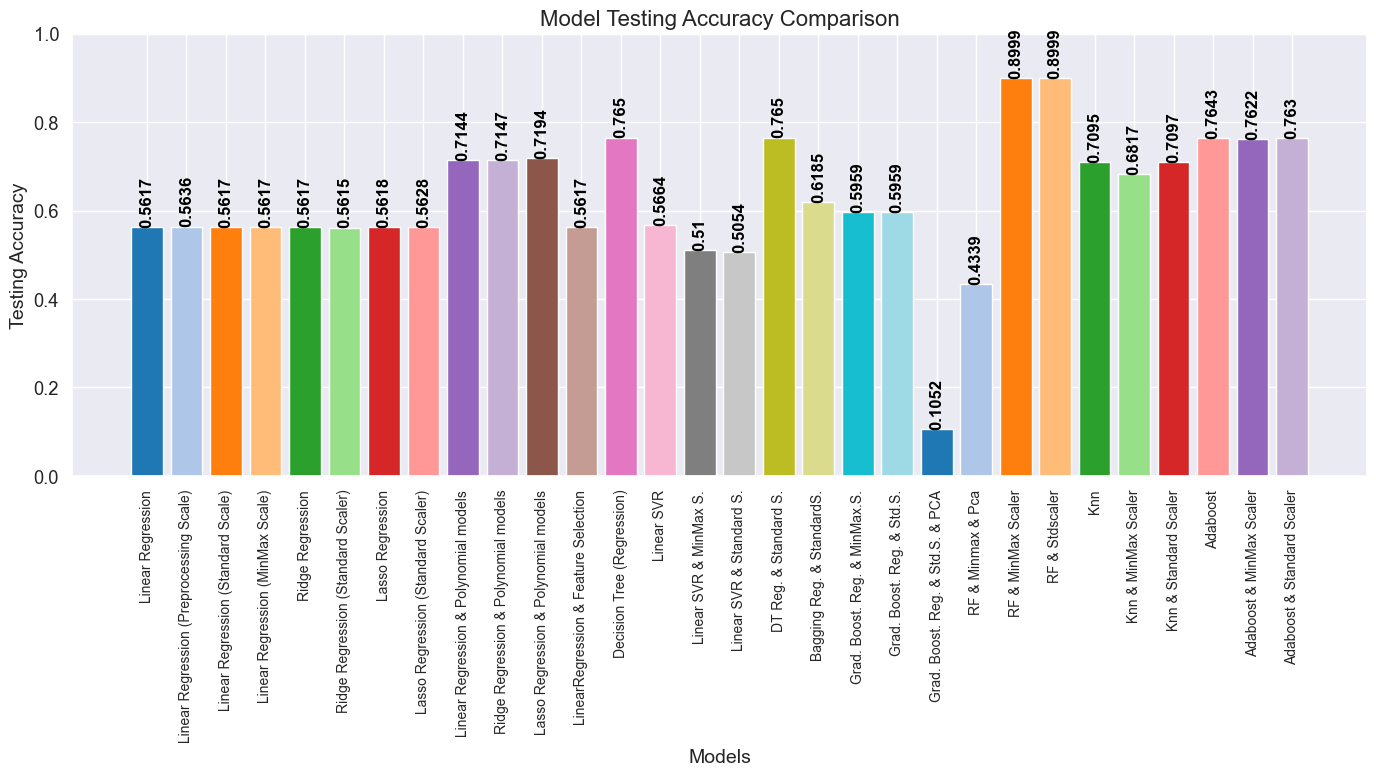

In [387]:
# Necessary imports for visualization
import matplotlib.pyplot as plt
import pandas as pd

# Data: Provided model performances in a DataFrame
data = {
    'Index': range(30),
    'Method': ['Linear Regression', 'Linear Regression (Preprocessing Scale)', 'Linear Regression (Standard Scale)', 
               'Linear Regression (MinMax Scale)', 'Ridge Regression', 'Ridge Regression (Standard Scaler)', 
               'Lasso Regression', 'Lasso Regression (Standard Scaler)', 'Linear Regression & Polynomial models', 
               'Ridge Regression & Polynomial models', 'Lasso Regression & Polynomial models', 
               'LinearRegression & Feature Selection', 'Decision Tree (Regression)', 'Linear SVR', 
               'Linear SVR & MinMax S.', 'Linear SVR & Standard S.', 'DT Reg. & Standard S.', 
               'Bagging Reg. & StandardS.', 'Grad. Boost. Reg. & MinMax.S.', 'Grad. Boost. Reg. & Std.S.', 
               'Grad. Boost. Reg. & Std.S. & PCA', 'RF & Minmax & Pca', 'RF & MinMax Scaler', 
               'RF & Stdscaler', 'Knn', 'Knn & MinMax Scaler', 'Knn & Standard Scaler', 'Adaboost', 
               'Adaboost & MinMax Scaler', 'Adaboost & Standard Scaler'],
    'Testing Accuracy': [0.5617, 0.5636, 0.5617, 0.5617, 0.5617, 0.5615, 0.5618, 0.5628, 0.7144, 
                         0.7147, 0.7194, 0.5617, 0.7650, 0.5664, 0.5100, 0.5054, 0.7650, 0.6185, 
                         0.5959, 0.5959, 0.1052, 0.4339, 0.8999, 0.8999, 0.7095, 0.6817, 0.7097, 
                         0.7643, 0.7622, 0.7630]
}

# Create a DataFrame using the provided data
df = pd.DataFrame(data)

# Plotting the bar graph for Testing Accuracy
plt.figure(figsize=(14, 8))
bars = plt.bar(df['Method'], df['Testing Accuracy'], color=plt.cm.get_cmap('tab20').colors[:len(df['Method'])])

# Adding titles and labels
plt.title('Model Testing Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Testing Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis to range from 0 to 1 (assuming accuracy values range from 0 to 1)

# Annotating each bar with the testing accuracy value vertically
for bar in bars:
    yval = bar.get_height()
    # Display text vertically
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), 
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold', rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()


##### <i>[Insights]
<i>Because our objective is get the model with 85% to 95% accuracy, we will use "Testing accuracy" to compare each models.
    <br><i> Since "Lasso Regression & Polynomial models", "Decision Tree (Regression) & Standard Slacer", "Gradient Boosint & Standard Scaler",    "Adaboost" and "Knn & std. scaler"  have relatively good score, we will perform Hyperparameter Tuning on these.Although we not gonna do tuning Random forest & std scaler , due to risk of overfitting.

### Hyperparameter Tuning

#### Lasso Regression & Polynomial Features & Randomized Search CV

In [388]:
from sklearn.model_selection import RandomizedSearchCV

In [389]:
model_name = 'Lasso Reg. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [390]:
pipe = make_pipeline(PolynomialFeatures(degree = 2, interaction_only=True), Lasso(alpha=0.2, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('lasso', Lasso(alpha=0.2, random_state=1))])

In [391]:
grid_values = {'polynomialfeatures__degree' : np.arange(1,5),
               'lasso__alpha' : np.arange(0.1, 0.5, 0.1),
               'lasso__max_iter' : np.arange(900,1200, 50)
              }

In [392]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.6951389468557518
Best Parameter:  {'polynomialfeatures__degree': 2, 'lasso__max_iter': 1100, 'lasso__alpha': 0.30000000000000004}


In [393]:
model = pipe

In [394]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Decision Tree Regression & Standard Scaler & Randomized Search CV

In [395]:
model_name = 'DT Reg. & Standard S. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [396]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=6))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=6))])

In [397]:
grid_values = {'decisiontreeregressor__criterion' : ['mse', 'friedman_mse', 'mae'],
               'decisiontreeregressor__splitter' : ['best', 'random'],
               'decisiontreeregressor__max_depth' : np.arange(5,15),
               'decisiontreeregressor__min_samples_leaf' : np.arange(1,15)
              }

In [398]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.7542837969968841
Best Parameter:  {'decisiontreeregressor__splitter': 'best', 'decisiontreeregressor__min_samples_leaf': 3, 'decisiontreeregressor__max_depth': 12, 'decisiontreeregressor__criterion': 'friedman_mse'}


In [399]:
model = pipe

In [400]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


#### Gradient Boosting Regressor & Standard Scaler & Randomized Search CV

In [401]:
from sklearn.model_selection import RandomizedSearchCV

In [402]:
model_name = 'Grad. Boost. Reg. & Std.S. & Rand S.'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [403]:
pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss='squared_error', n_estimators=10, random_state=1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=10, random_state=1))])

In [404]:
grid_values = {
                'gradientboostingregressor__n_estimators' : np.arange(1650,1710, 5),
                'gradientboostingregressor__loss' : ['ls', 'lad', 'huber', 'quantile'],
                'gradientboostingregressor__learning_rate' : np.arange(0.17,0.22,0.01),
                'gradientboostingregressor__max_depth' : np.arange(1, 5, 1),
                'gradientboostingregressor__criterion' : ['friedman_mse', 'mse', 'mae']
              }

In [405]:
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

Best Cross Validation Accuracy:  0.9129540391438489
Best Parameter:  {'gradientboostingregressor__n_estimators': 1695, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__loss': 'huber', 'gradientboostingregressor__learning_rate': 0.17, 'gradientboostingregressor__criterion': 'friedman_mse'}


In [406]:
model = pipe

In [407]:
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


###  Random Forest & Standard scaler & Randomized Search Cv

from sklearn.model_selection import RandomizedSearchCV

# Model name
model_name = 'Random Forest & Std.S. & Rand S.'
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create pipeline with StandardScaler and RandomForestRegressor
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))
pipe.fit(X_train, y_train)
                     

# Define grid of hyperparameter values for RandomizedSearchCV
grid_values = {
    'randomforestregressor__n_estimators': np.arange(100, 500, 50),  # Number of trees in the forest
    'randomforestregressor__max_depth': np.arange(2, 15, 1),  # Maximum depth of the tree
    'randomforestregressor__min_samples_split': np.arange(2, 10, 1),  # Minimum number of samples required to split a node
    'randomforestregressor__min_samples_leaf': np.arange(1, 5, 1),  # Minimum number of samples required to be at a leaf node
    'randomforestregressor__bootstrap': [True, False],  # Whether bootstrap samples are used
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for best split
}

grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameter: ", best_parameter)

pipe = grid

model = pipe

resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

### Adaboost Std scaler &  Randomized Search Cv

In [408]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [409]:
# Model name
model_name = 'AdaBoost & Std.S. & Rand S.'
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [410]:
# Create pipeline with StandardScaler and AdaBoostRegressor
pipe = make_pipeline(StandardScaler(), AdaBoostRegressor(random_state=1))
pipe.fit

<bound method Pipeline.fit of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor(random_state=1))])>

In [411]:
# Define grid of hyperparameter values for RandomizedSearchCV
grid_values = {
    'adaboostregressor__n_estimators': np.arange(1, 1000, 50),  # Number of boosting stages
    'adaboostregressor__learning_rate': np.arange(0.01, 1.1, 0.1),  # Learning rate shrinks contribution of each regressor
    'adaboostregressor__loss': ['linear', 'square', 'exponential']  # Loss function to use
}


In [412]:
# Perform RandomizedSearchCV for hyperparameter tuning
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Best cross-validation accuracy and best parameters
best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameters: ", best_parameter)

Best Cross Validation Accuracy:  0.7705897000522934
Best Parameters:  {'adaboostregressor__n_estimators': 901, 'adaboostregressor__loss': 'square', 'adaboostregressor__learning_rate': 0.31000000000000005}


In [413]:
# Update pipeline with the best model
pipe = grid
model = pipe

In [414]:
 
 
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf

,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


### Knn & std scaler & randomized search cv

In [430]:
# Necessary imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np

# Model name
model_name = 'KNN & Std.S. & Rand S.'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create pipeline with StandardScaler and KNeighborsRegressor
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

grid_values = {
    'kneighborsregressor__n_neighbors': np.arange(1, 50, 5),  # Explore a broader range for number of neighbors
    'kneighborsregressor__weights': ['uniform', 'distance'],  # Same weight functions for variety
    'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Explore all algorithms for finding neighbors
    'kneighborsregressor__p': [1, 2, 3, 4],  # Test higher values of p for the Minkowski distance metric
    'kneighborsregressor__leaf_size': np.arange(20, 100, 10),  # Vary the leaf size for the tree-based algorithms
    'kneighborsregressor__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],  # Try different distance metrics
}





# Perform RandomizedSearchCV for hyperparameter tuning
grid = RandomizedSearchCV(pipe, grid_values, cv=10, random_state=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Best cross-validation accuracy and best parameters
best_cross_validation_accuracy = grid.best_score_
print("Best Cross Validation Accuracy: ", best_cross_validation_accuracy)

best_parameter = grid.best_params_
print("Best Parameters: ", best_parameter)

# Update pipeline with the best model
pipe = grid
model = pipe

# Assuming print_results is defined to output the model performance
resultsDf = print_results(model, X_train, y_train, X_test, y_test, resultsDf)
resultsDf


Best Cross Validation Accuracy:  0.7052577266481709
Best Parameters:  {'kneighborsregressor__weights': 'distance', 'kneighborsregressor__p': 4, 'kneighborsregressor__n_neighbors': 6, 'kneighborsregressor__metric': 'minkowski', 'kneighborsregressor__leaf_size': 30, 'kneighborsregressor__algorithm': 'ball_tree'}


,index,Method,Training accuracy,Testing accuracy,Mean Absolute Error,Root Mean Squared Error,R2 Squared
0,0,Linear Regression,0.6179,0.5617,8.7103,10.8628,0.5617
1,1,Linear Regression (Preprocessing Scale),0.6179,0.5636,8.7996,10.8395,0.5636
2,2,Linear Regression (Standard Scale),0.6179,0.5617,8.7103,10.8628,0.5617
3,3,Linear Regression (MinMax Scale),0.6179,0.5617,8.7103,10.8628,0.5617
4,4,Ridge Regression,0.6179,0.5617,8.7103,10.8628,0.5617
5,5,Ridge Regression (Standard Scaler),0.6179,0.5615,8.7138,10.8657,0.5615
6,6,Lasso Regression,0.6179,0.5618,8.7089,10.8622,0.5618
7,7,Lasso Regression (Standard Scaler),0.6159,0.5628,8.7617,10.8497,0.5628
8,8,Linear Regression & Polynomial models,0.7500,0.7144,7.0957,8.7680,0.7144
9,9,Ridge Regression & Polynomial models,0.7500,0.7147,7.0943,8.7648,0.7147


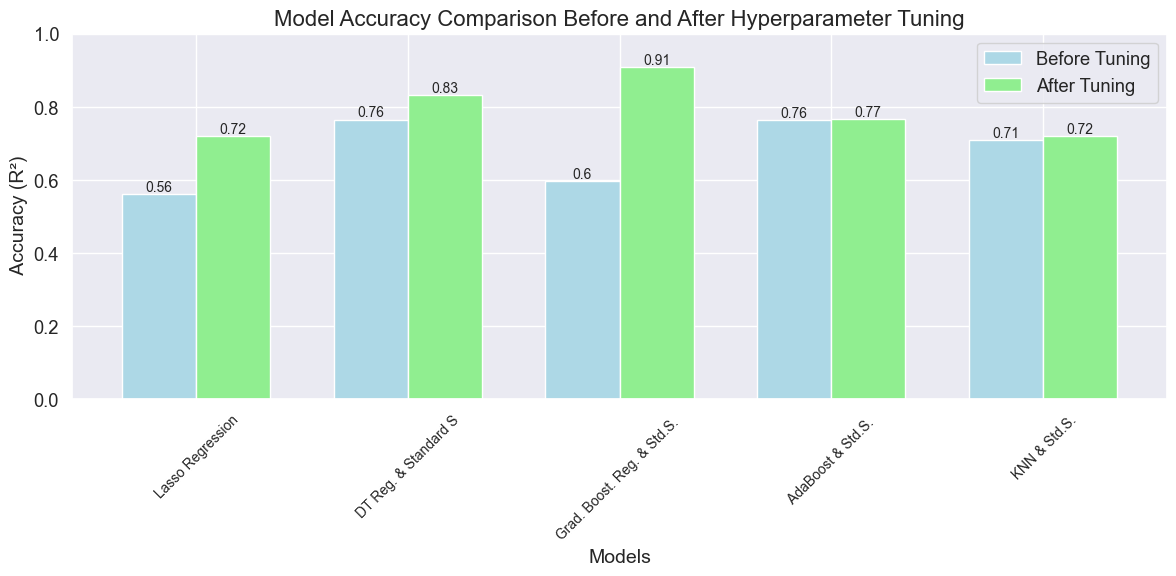

In [431]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data
models = [
    ' Lasso Regression',
    'DT Reg. & Standard S',
    'Grad. Boost. Reg. & Std.S. ',
        ' AdaBoost & Std.S. ',
    ' KNN & Std.S.',
]

# Before Hyperparameter Tuning (sample accuracies)
accuracy_before = [0.5618,  0.7650,0.5959,     0.7630, 0.7097]

# After Hyperparameter Tuning (sample accuracies)
accuracy_after = [0.7195,0.8311,0.9092, 0.7666,0.7192 ]

# Create a DataFrame for easier handling
df = pd.DataFrame({
    'Model': models,
    'Accuracy Before Tuning': accuracy_before,
    'Accuracy After Tuning': accuracy_after
})

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the bars
x = np.arange(len(models))

# Create the bar plots
plt.figure(figsize=(12, 6))
bars_before = plt.bar(x - bar_width/2, df['Accuracy Before Tuning'], bar_width, label='Before Tuning', color='lightblue')
bars_after = plt.bar(x + bar_width/2, df['Accuracy After Tuning'], bar_width, label='After Tuning', color='lightgreen')

# Adding titles and labels
plt.title('Model Accuracy Comparison Before and After Hyperparameter Tuning', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel(' Accuracy (R²)', fontsize=14)
plt.xticks(x, df['Model'], rotation=45, fontsize=10)  # Set the x-axis labels
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Adding legend
plt.legend()

# Annotating each bar with the accuracy value
for bar in bars_before:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

for bar in bars_after:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()


#### Time

In [418]:
endTime = datetime.now()

In [419]:
total_time = endTime - startTime

In [420]:
print("Start: ", startTime)
print("End  : ", endTime)
print("Time : ", total_time)

Start:  2024-10-19 11:53:55.130281
End  :  2024-10-19 11:54:52.253572
Time :  0:00:57.123291


### <i>[Conclusion]
<i>Comparing three results from the Hyperparameter Tuning ("Lasso Regression & Polynomial models", "Decision Tree (Regression) & Standard Slacer", and "Gradient Boosint & Standard Scaler"), we noted that "Gradient Boosint & Standard Scaler" achieved highest Testing accuracy.
    <i><br> Kfold Cross Validation with CV=10 was used to calculate training accuracy when evaluating three results from Hyperparameter Tuning in addition to the testing accuracy.
    <i><br> Originally, we used both GridSearchCV and RandomSearchCV but because those RandomSearchCV has similar or relatively better performance then GridSearchCV and faster speed, we decided to use only RandomSearchCV.
    <i><br> The model "Gradient Boosint & Standard Scaler" with RandomSearchCV achieved 0.9959 in the Training accuracy and 0.9315 in the Testing accuracy.

### Github

 https://github.com/Ahmadazeem73/Ahmadazeem73.git